# Import the Fashion MNIST dataset

This guide uses the Fashion MNIST dataset, which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 × 28 pixels), as seen here:
Fashion MNIST sprite
Figure 1. Fashion-MNIST samples (by Zalando, MIT License).
 
<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite" width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>
 
 
 

Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, using the Datasets API:


# Load the Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv


# Load and Explore Dataset

In [2]:
train_df = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
test_df = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')
print('The shape of training dataset : ', train_df.shape)
print('The shape of testing dataset : ', test_df.shape)

The shape of training dataset :  (60000, 785)
The shape of testing dataset :  (10000, 785)


In [3]:
train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Now we start with converting the pixel values into array format**

In [4]:
train = np.array(train_df, dtype = 'float32')
test = np.array(test_df, dtype = 'float32')

In [5]:
x_train = train[:,1:]/255

y_train = train[:,0]

x_test= test[:,1:]/255

y_test=test[:,0]

**Let us split the training and test datasets**

In [6]:
X_train, X_validate,y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 5000)
print('The size of training data after model selection : ', X_train.shape, y_train.shape)
print('The size of Validation data after model selection : ', X_validate.shape, y_validate.shape)

The size of training data after model selection :  (48000, 784) (48000,)
The size of Validation data after model selection :  (12000, 784) (12000,)


# Data Visualization

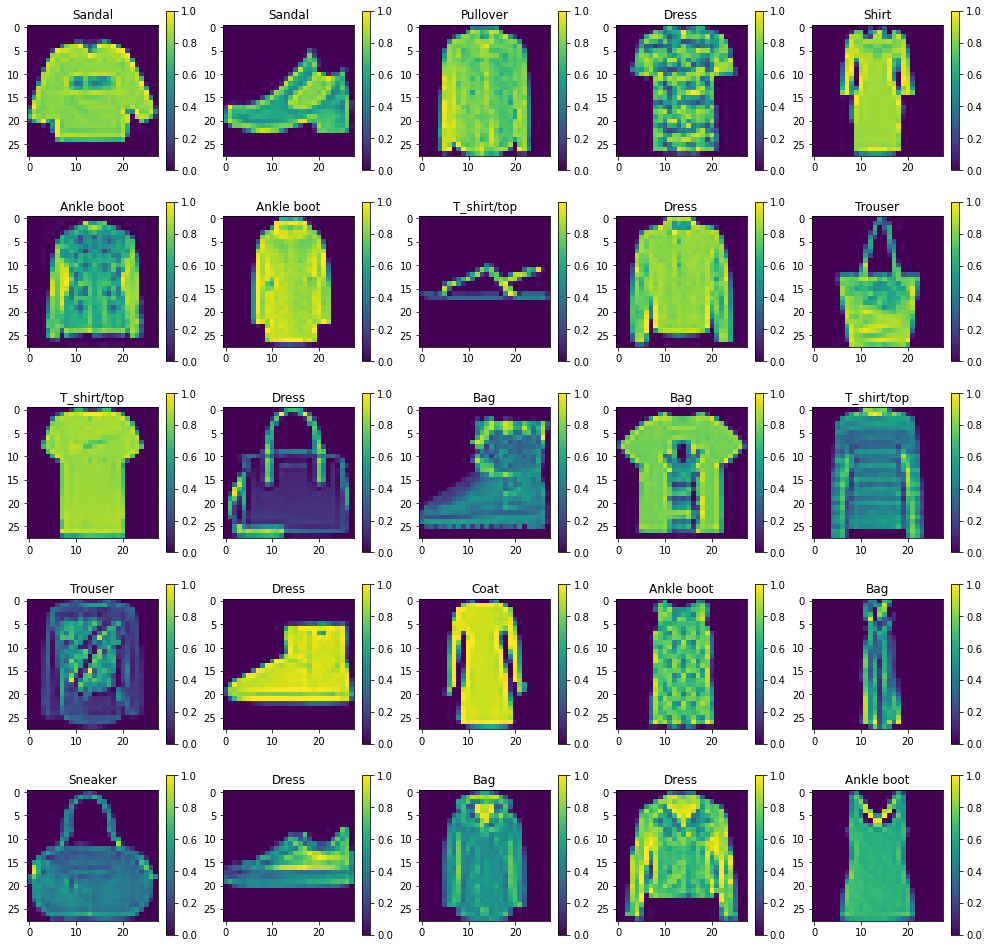

In [7]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(17, 17))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    plt.colorbar()
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

# Model Development

**Before we start with model layout let's do some basic things**

In [8]:
#Assigning image dimensions for model
img_rows = 28
img_cols = 28
img_shape = (img_rows, img_cols,1)

X_train = X_train.reshape(X_train.shape[0],*img_shape)
x_test = x_test.reshape(x_test.shape[0],*img_shape)
X_validate = X_validate.reshape(X_validate.shape[0],*img_shape)


# Simple layered Neural Network

**Without Dropout**

In [9]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = img_shape),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dropout(0.8),
        tf.keras.layers.Dense(10, activation = 'softmax') #since we want a probability based output
])
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 30, verbose=2, validation_data=(X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 - 5s - loss: 0.7594 - accuracy: 0.7246 - val_loss: 0.4805 - val_accuracy: 0.8183
Epoch 2/30
48000/48000 - 4s - loss: 0.5976 - accuracy: 0.7799 - val_loss: 0.4349 - val_accuracy: 0.8416
Epoch 3/30
48000/48000 - 4s - loss: 0.5648 - accuracy: 0.7947 - val_loss: 0.4150 - val_accuracy: 0.8467
Epoch 4/30
48000/48000 - 4s - loss: 0.5487 - accuracy: 0.7990 - val_loss: 0.4215 - val_accuracy: 0.8488
Epoch 5/30
48000/48000 - 4s - loss: 0.5351 - accuracy: 0.8032 - val_loss: 0.4107 - val_accuracy: 0.8545
Epoch 6/30
48000/48000 - 4s - loss: 0.5237 - accuracy: 0.8105 - val_loss: 0.3942 - val_accuracy: 0.8582
Epoch 7/30
48000/48000 - 4s - loss: 0.5150 - accuracy: 0.8126 - val_loss: 0.3850 - val_accuracy: 0.8627
Epoch 8/30
48000/48000 - 4s - loss: 0.5066 - accuracy: 0.8150 - val_loss: 0.3895 - val_accuracy: 0.8622
Epoch 9/30
48000/48000 - 4s - loss: 0.4992 - accuracy: 0.8186 - val_loss: 0.3780 - val_accuracy: 0.8655
Epoch 10/30
48

**Lets check the plots**

Text(0.5, 1.0, 'Train - Accuracy')

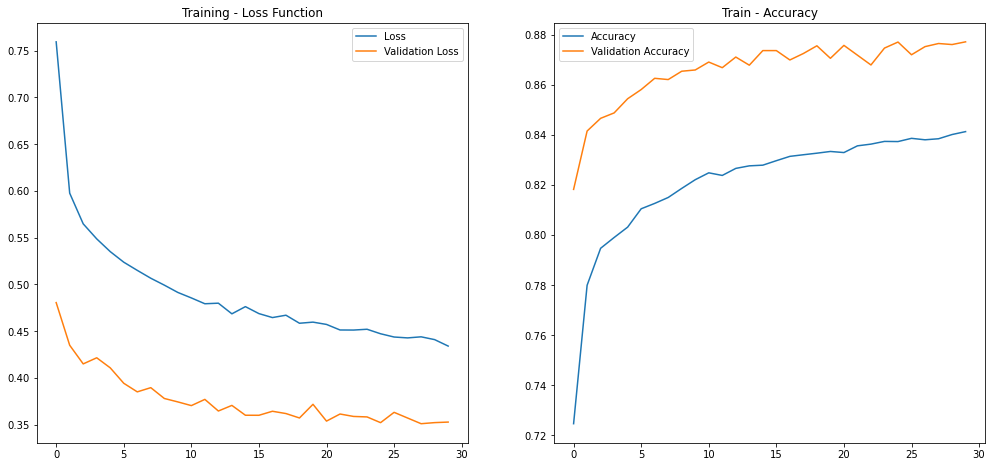

In [10]:
plt.figure(figsize=(17,17))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

**With Dropout**

In [11]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = img_shape),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation = 'softmax') #since we want a probability based output
])


**Description of model is shown below**

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs = 30, verbose=2, validation_data=(X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 - 5s - loss: 0.5187 - accuracy: 0.8151 - val_loss: 0.5125 - val_accuracy: 0.7949
Epoch 2/30
48000/48000 - 4s - loss: 0.3994 - accuracy: 0.8545 - val_loss: 0.3832 - val_accuracy: 0.8600
Epoch 3/30
48000/48000 - 4s - loss: 0.3645 - accuracy: 0.8656 - val_loss: 0.3467 - val_accuracy: 0.8741
Epoch 4/30
48000/48000 - 4s - loss: 0.3395 - accuracy: 0.8729 - val_loss: 0.3207 - val_accuracy: 0.8856
Epoch 5/30
48000/48000 - 4s - loss: 0.3230 - accuracy: 0.8803 - val_loss: 0.3330 - val_accuracy: 0.8823
Epoch 6/30
48000/48000 - 4s - loss: 0.3122 - accuracy: 0.8835 - val_loss: 0.3329 - val_accuracy: 0.8816
Epoch 7/30
48000/48000 - 4s - loss: 0.2991 - accuracy: 0.8879 - val_loss: 0.3136 - val_accuracy: 0.8864
Epoch 8/30
48000/48000 - 4s - loss: 0.2900 - accuracy: 0.8916 - val_loss: 0.3124 - val_accuracy: 0.8867
Epoch 9/30
48000/48000 - 4s - loss: 0.2790 - accuracy: 0.8968 - val_loss: 0.3167 - val_accuracy: 0.8875
Epoch 10/30
48

**Plots after using dropout**

Text(0.5, 1.0, 'Train - Accuracy')

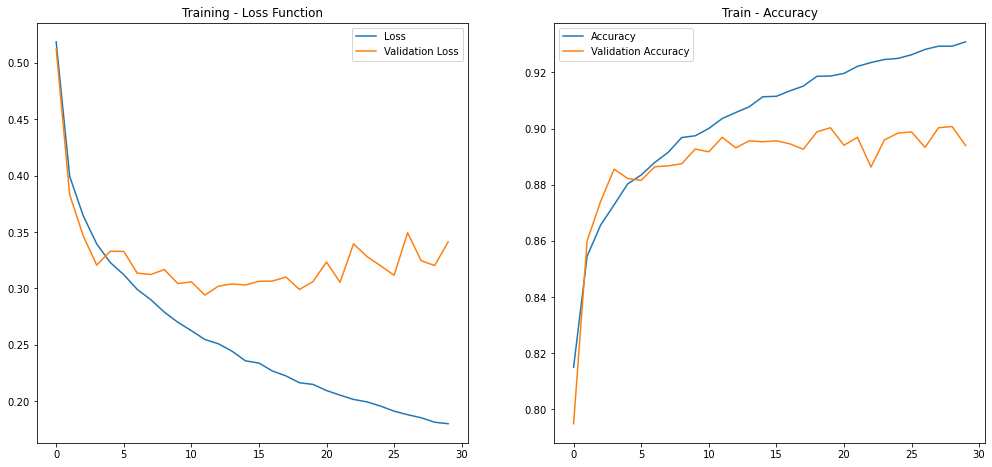

In [15]:
plt.figure(figsize=(17,17))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

# CNN Model

In [16]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [17]:
cnn_model.summary()
cnn_model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [18]:
history = cnn_model.fit(X_train, y_train, epochs = 30, verbose=2, validation_data=(X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 - 8s - loss: 0.4294 - accuracy: 0.8461 - val_loss: 0.3328 - val_accuracy: 0.8806
Epoch 2/30
48000/48000 - 5s - loss: 0.2818 - accuracy: 0.8980 - val_loss: 0.2763 - val_accuracy: 0.8993
Epoch 3/30
48000/48000 - 5s - loss: 0.2347 - accuracy: 0.9141 - val_loss: 0.2479 - val_accuracy: 0.9129
Epoch 4/30
48000/48000 - 5s - loss: 0.2025 - accuracy: 0.9254 - val_loss: 0.2401 - val_accuracy: 0.9138
Epoch 5/30
48000/48000 - 5s - loss: 0.1735 - accuracy: 0.9351 - val_loss: 0.2252 - val_accuracy: 0.9201
Epoch 6/30
48000/48000 - 5s - loss: 0.1468 - accuracy: 0.9452 - val_loss: 0.2470 - val_accuracy: 0.9149
Epoch 7/30
48000/48000 - 5s - loss: 0.1234 - accuracy: 0.9544 - val_loss: 0.2401 - val_accuracy: 0.9235
Epoch 8/30
48000/48000 - 6s - loss: 0.1064 - accuracy: 0.9610 - val_loss: 0.2504 - val_accuracy: 0.9208
Epoch 9/30
48000/48000 - 5s - loss: 0.0882 - accuracy: 0.9676 - val_loss: 0.2493 - val_accuracy: 0.9253
Epoch 10/30
48

Text(0.5, 1.0, 'Train - Accuracy')

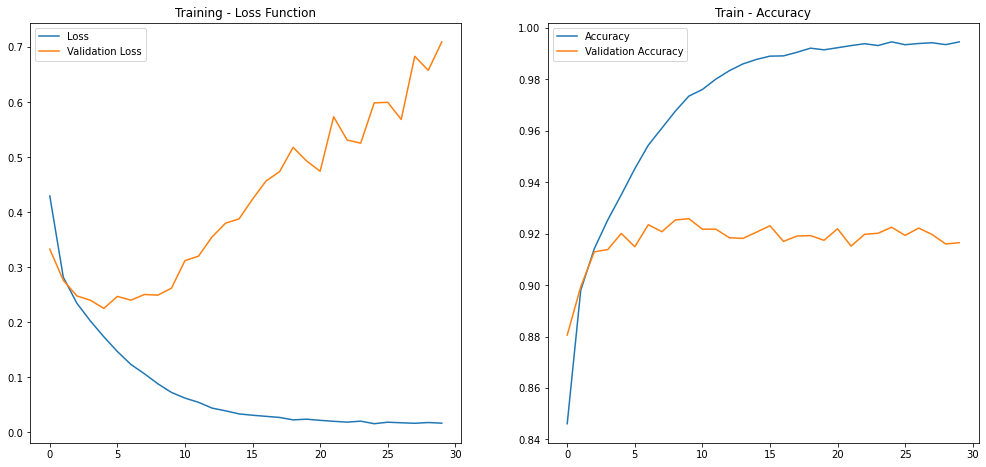

In [19]:
plt.figure(figsize=(17,17))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

# Discussion
Though the accuracy obtained on validation set using CNN was good this model still needs improvement and will be updating it in next versions!!

Do upvote my Kernel if you liked it. It is my first implementation code on CNN